In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sb.set_style("whitegrid")



In [2]:
hdf = pd.read_csv('hour.csv', delimiter = ',') 

In [3]:
corr = hdf.corr() 

<AxesSubplot:>

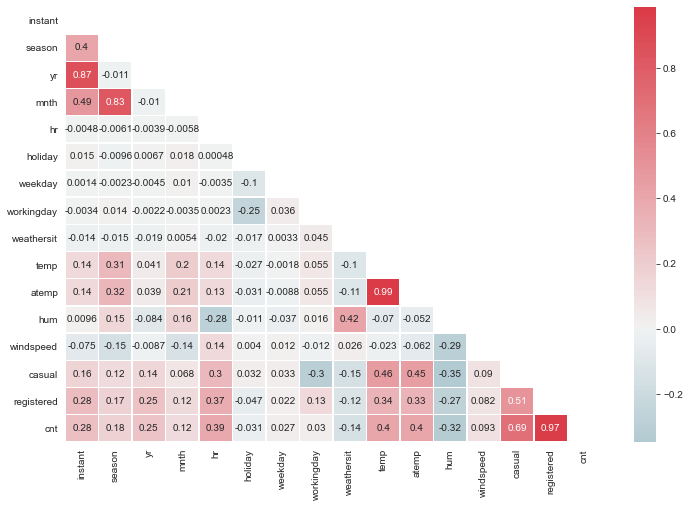

In [4]:
plt.figure(figsize = (12,8))
mask = np.triu(np.ones_like(corr,dtype= bool))
colormap = sb.diverging_palette(220, 10, as_cmap=True)
sb.set_style("whitegrid")
sb.heatmap(corr, mask=mask, cmap = colormap, center = 0, annot= True, linewidths=.5)

## feature importance

In [5]:
hdf_merged = pd.melt(hdf, id_vars=['dteday', 'season', 'yr', 'mnth', "hr", 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], value_vars=["casual", "registered"]).sort_values(by = "dteday").reset_index (drop = True)

In [9]:
wqp_features = hdf_merged.drop(columns = ["variable","value", "dteday"], axis =1)  
wqp_class_labels = np.array(hdf_merged['variable'])
wqp_label_names = ['registered', 'casual']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'registered': 12175, 'casual': 12155}) Counter({'casual': 5224, 'registered': 5204})
Features: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [10]:
from sklearn.preprocessing import MinMaxScaler
# Define the scaler
wqp_ss = MinMaxScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [11]:
# train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
wqp_dt = DecisionTreeClassifier(random_state=1)
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

  registered       0.20      0.23      0.21      5224
      casual       0.09      0.08      0.09      5204

    accuracy                           0.16     10428
   macro avg       0.15      0.16      0.15     10428
weighted avg       0.15      0.16      0.15     10428



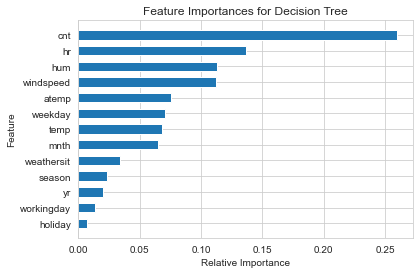

In [12]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')